# **Lab 8.1 Transfer Learning & Multitask Learning**

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision.models as models
import torchvision.transforms as transforms

from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader,Subset,Dataset,random_split
from PIL import Image


import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix

Complete the `MultiLanguageHandwrittenDataset` class below. It should return:
- `image`: the image data
- `label`: the digit label (0-9)
- `language`: the language (Thai or English)


In [3]:
### START CODE HERE ###
class MultiLanguageHandwrittenDataset(Dataset):
    def __init__(self, root_dirs, languages, transforms=None):
        self.root_dirs = root_dirs
        self.languages = languages
        self.transform = transforms
        self.samples = []
        for root_dir, language in zip(self.root_dirs, self.languages):
            for subdir in os.scandir(root_dir):
                if subdir.is_dir():
                    label = int(subdir.name)
                    for file in os.scandir(subdir.path):
                        if file.is_file():
                            self.samples.append((file.path, label, language))
        print(self.samples)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):

            
        return image, label, language
### END CODE HERE ###

use you `MultiLanguageHandwrittenDataset` here and display the first batch
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

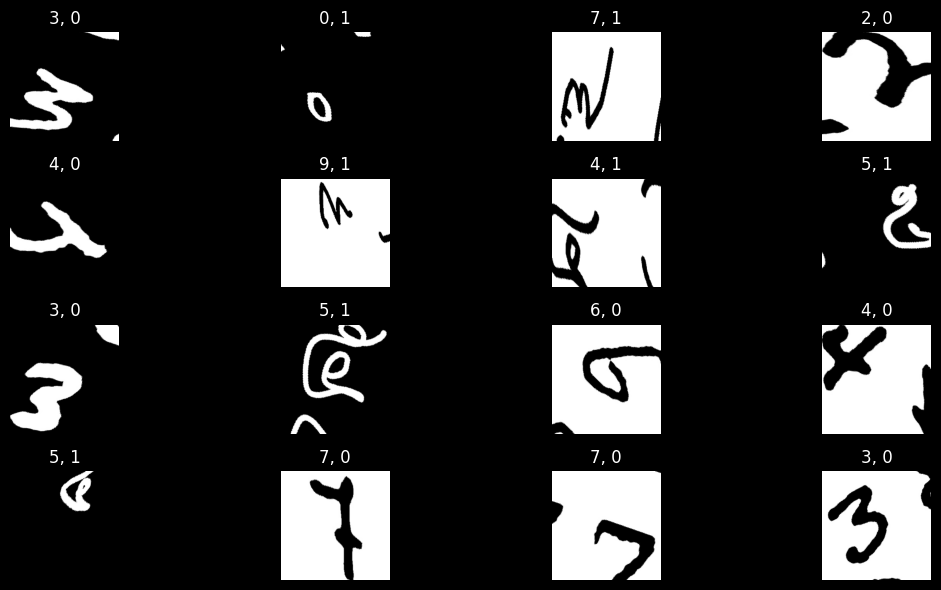

</details>

In [ ]:
### START CODE HERE ###
root_dirs = [None]
languages = [None]

dataset = MultiLanguageHandwrittenDataset(None)
dataloader = DataLoader(None)
### END CODE HERE ###


## Transfer learning

Complete the `customVGG16` class below, which can create a pretrained VGG16 model and customize the number of fully connected (FC) layers. It also allows adding new convolutional layers and unfreezing pretrained layers based on their index.

In [6]:
### START CODE HERE ###
class customVGG16(nn.Module):
    def __init__(self,add_feat_dims=None,h_dims=None,num_classes=10,input_size=(1,28,28),trainable_layers_idx=None):
        super(customVGG16, self).__init__()
        self.vgg16 = models.vgg16(pretrained=True)
        for param in self.vgg16.features[:].parameters():
            param.requires_grad = False

        for param in self.vgg16.classifier.parameters():
            param.requires_grad = True
        if trainable_layers_idx is not None:
            for idx in trainable_layers_idx:
                for param in self.vgg16.features[idx].parameters():
                    param.requires_grad = True

        ...


    def _get_input_size_fc(self, input_shape):
        with torch.no_grad():
            x = torch.zeros(1, *input_shape)
            x = self.vgg16.features(x)
            x = self.vgg16.avgpool(x)
            x = torch.flatten(x[0])
            return x.size(0)
    
    def forward(self, x):
        pass
        return x
### END CODE HERE ###


Example usage
```
trainable_layers_idx = [-1,-2,-3,-4,-5]
model = customVGG16(add_feat_dims=[512],h_dims=[512,256,256],input_size=(3,224,224),trainable_layers_idx=trainable_layers_idx)

```


Complete the `train` function below, which logs Loss/train, Accuracy/train, Loss/test, and Accuracy/test to [TensorBoard](https://pytorch.org/docs/stable/tensorboard.html).Then, complete the evaluate_task function, which prints the classification report and plots the confusion matrix

In [8]:
### START CODE HERE ###
def train(model,opt,loss_fn,train_loader,val_loader,epochs=10,writer=None,checkpoint_path=None,device='cpu',task='digit'):
    pass




def evaluate_task(y_true, y_pred, task_name="Task"):
    pass
### END CODE HERE ###


### Transfer learning for Digit classification task
Declare the `customVGG16` model with custom layers of your choice. Then, split the dataset into training, validation, and test sets, and proceed to train the model.

In [ ]:
### START CODE HERE ###
model1 = customVGG16(None)

train_dataset, val_dataset, test_dataset = None

writer = None
opt = None
loss_fn = None
train(None)
### END CODE HERE ###


use `evaluate_task` to evlauate you model1 here.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

```
Digit - Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        26
           1       0.75      0.94      0.83        32
           2       0.66      0.54      0.59        39
           3       0.76      0.54      0.63        35
           4       0.68      0.53      0.60        47
           5       0.52      0.42      0.47        33
           6       0.59      0.88      0.71        33
           7       0.46      0.59      0.52        27
           8       0.70      0.65      0.67        43
           9       0.85      0.83      0.84        35

    accuracy                           0.67       350
   macro avg       0.67      0.68      0.67       350
weighted avg       0.68      0.67      0.67       350

```

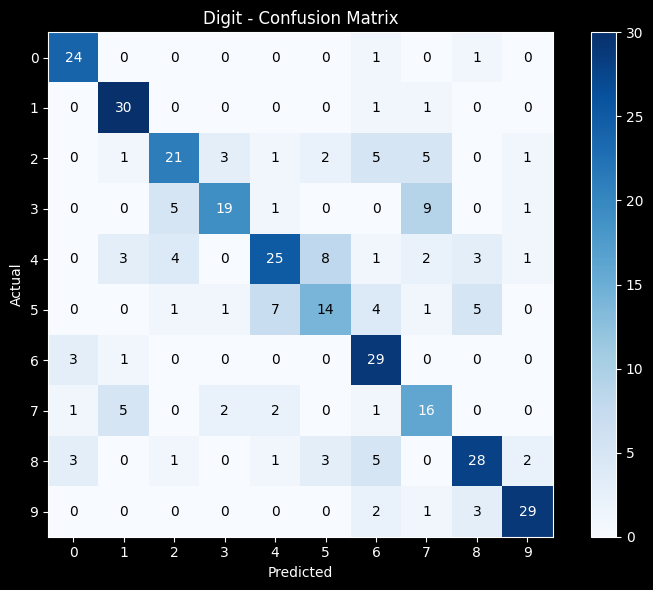

</details>

In [ ]:
### START CODE HERE ###

### END CODE HERE ###


### Transfer learning for Language classification task
Declare a NEW `customVGG16` model with custom layers of your choice.

In [ ]:
### START CODE HERE ###
model2 = customVGG16(None)

train_dataset, val_dataset, test_dataset = None

writer = None
opt = None
loss_fn = None
train(None)
### END CODE HERE ###


use `evaluate_task` to evlauate you model2 here.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

```
Language - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       175
           1       0.99      0.93      0.96       175

    accuracy                           0.96       350
   macro avg       0.96      0.96      0.96       350
weighted avg       0.96      0.96      0.96       350

```

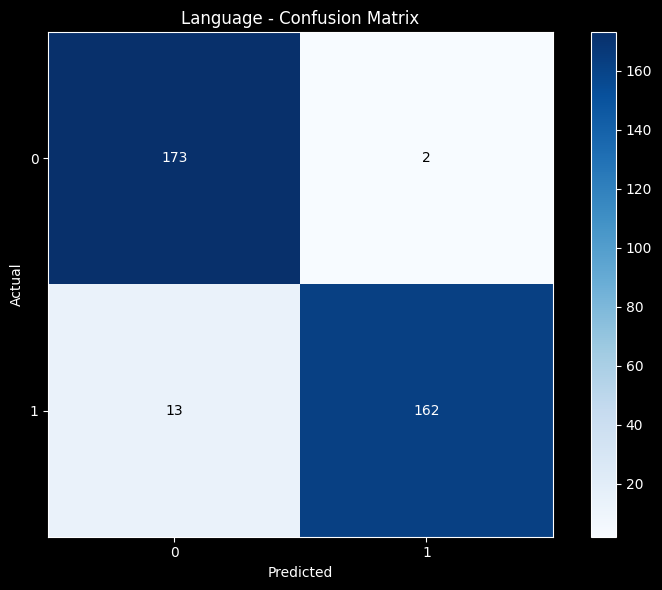

</details>

In [ ]:
### START CODE HERE ###

### END CODE HERE ###

---

## Multitask learning

Complete the `customVGG16_multitask` class below, which can create a pretrained VGG16 model and customize the number of fully connected (FC) layers. It also allows adding new convolutional layers and unfreezing pretrained layers based on their index. Additionally, it allows branching the model into two heads for multitask learning, where one head handles digit classification, and the other handles language classification

In [16]:
class customVGG16_multitask(nn.Module):
    def __init__(self,add_feat_dims=None,h_dims=None,input_size=(1,28,28),trainable_layers_idx=None):
        super(customVGG16_multitask, self).__init__()
        pass

    def _get_input_size_fc(self, input_shape):
        with torch.no_grad():
            x = torch.zeros(1, *input_shape)
            x = self.vgg16.features(x)
            x = self.vgg16.avgpool(x)
            x = torch.flatten(x[0])
            return x.size(0)
    
    def forward(self, x):

        out1 = self.vgg16.digit(x)
        out2 = self.vgg16.lang(x)

        return out1,out2
        

Complete the `train_multi` function below, which train multitask model and  logs Loss/train, Accuracy/train, Loss/test, and Accuracy/test to [TensorBoard](https://pytorch.org/docs/stable/tensorboard.html).

In [17]:
def train_multi(model, opt, loss_fn, train_loader, val_loader, epochs=10, writer=None, checkpoint_path=None, device='cpu'):
    pass



In [ ]:
### START CODE HERE ###
model = customVGG16(None)

train_dataset, val_dataset, test_dataset = None

writer = None
opt = None
loss_fn = None
train(None)
### END CODE HERE ###


use `evaluate_task` to evlauate you model here.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

```
Digit - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        35
           1       0.81      0.91      0.85        32
           2       0.76      0.55      0.64        40
           3       0.53      0.66      0.58        32
           4       0.54      0.29      0.38        24
           5       0.51      0.57      0.54        37
           6       0.68      0.72      0.70        29
           7       0.60      0.71      0.65        34
           8       0.62      0.71      0.66        48
           9       0.68      0.49      0.57        39

    accuracy                           0.65       350
   macro avg       0.66      0.65      0.64       350
weighted avg       0.66      0.65      0.65       350

```

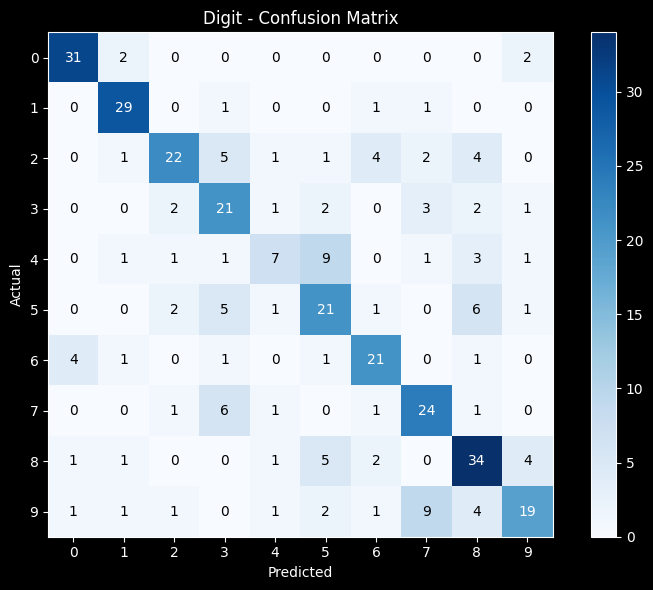

```
Language - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       172
           1       0.98      0.98      0.98       178

    accuracy                           0.98       350
   macro avg       0.98      0.98      0.98       350
weighted avg       0.98      0.98      0.98       350
```

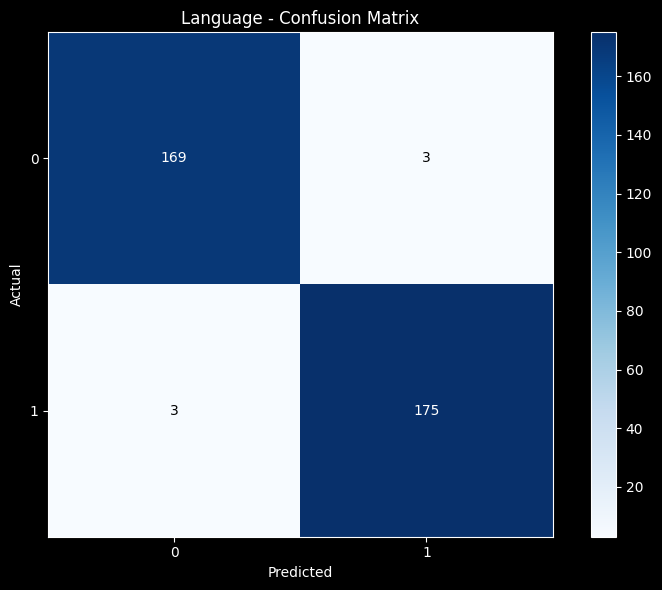

</details>

In [ ]:
### START CODE HERE ###

### END CODE HERE ###


---
# Question
1. If you build two separate models, one for each task with a different classification problem, 
how does the overall model size of two separate models compared to a single model with shared layers and two classifiers 
at the end?

2. In what scenarios might a single model with two classifiers outperform two separate models in terms of generalization? Is there a risk of one task negatively affecting the other?

3. How can weighted loss functions be applied in a single model with two classifiers to balance the performance of both tasks?